In [63]:
import glob
import time

import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import hog
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import pickle
from scipy.ndimage.measurements import label

% matplotlib inline

In [64]:
def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, 
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), 
                                  transform_sqrt=False, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, 
                       pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), 
                       transform_sqrt=False, 
                       visualise=vis, feature_vector=feature_vec)
        return features

In [65]:
def bin_spatial(img, size=(32, 32)):
    color1 = cv2.resize(img[:,:,0], size).ravel()
    color2 = cv2.resize(img[:,:,1], size).ravel()
    color3 = cv2.resize(img[:,:,2], size).ravel()
    return np.hstack((color1, color2, color3))
                        



In [66]:
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features


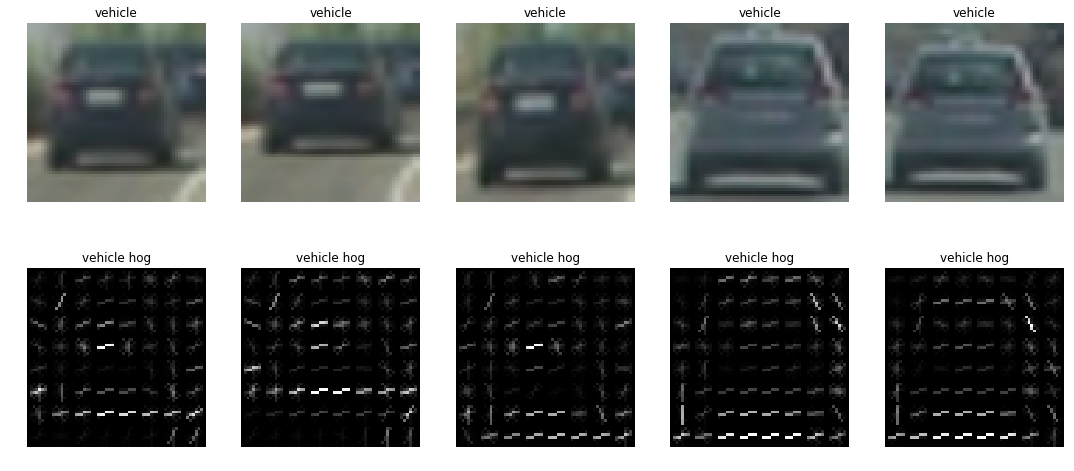

In [67]:
n_row = 2
n_col = 5

fig = plt.figure(figsize=(18,8))
fig.subplots_adjust(0.1,0.1)


orient = 9
pix_per_cell = 8
cell_per_block = 2

vehicle_images = glob.glob('C:\\Users\\Sally\\Anaconda3\\CarND-Vehicle-Detection\\test-vehicle\\image*.png')
non_vehicle_images = glob.glob('C:\\Users\\Sally\\Anaconda3\\CarND-Vehicle-Detection\\test-non-vehicle\\image*.png')


for i, img in zip(range(5), vehicle_images):
    image = cv2.imread(img)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    ax = fig.add_subplot(n_row,n_col,i+1)
    ax.set_axis_off()
    ax.set_title('vehicle')
    plt.imshow(image)
    
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    features, hog_images = get_hog_features(gray, orient, pix_per_cell, cell_per_block, vis=True, feature_vec=False)
    ax = fig.add_subplot(n_row,n_col,i+6)
    ax.set_axis_off()
    ax.set_title('vehicle hog')
    plt.imshow(hog_images, cmap = 'gray')


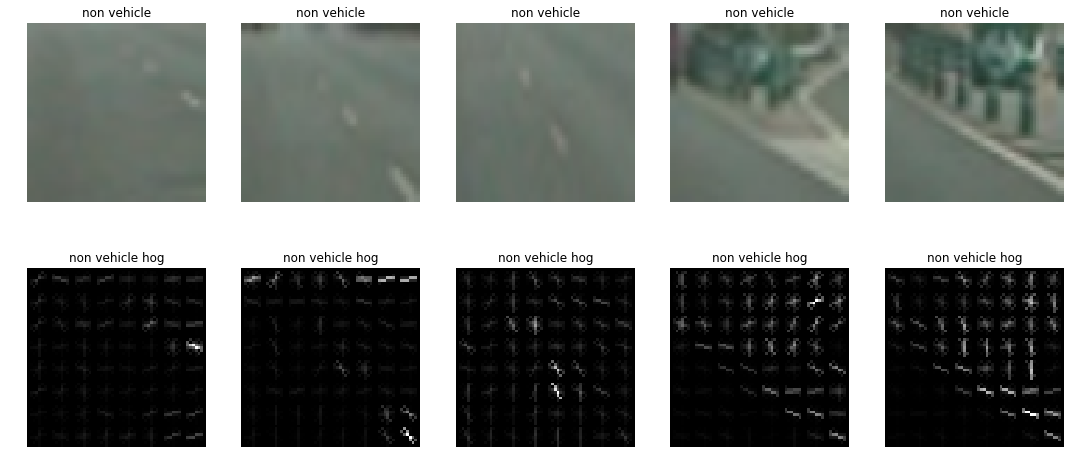

In [68]:

n_row = 2
n_col = 5

fig = plt.figure(figsize=(18,8))
fig.subplots_adjust(0.1,0.1)


orient = 9
pix_per_cell = 8
cell_per_block = 2


non_vehicle_images = glob.glob('C:\\Users\\Sally\\Anaconda3\\CarND-Vehicle-Detection\\test-non-vehicle\\image*.png')


for i, img in zip(range(5), non_vehicle_images):
    image = cv2.imread(img)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    ax = fig.add_subplot(n_row,n_col,i+1)
    ax.set_axis_off()
    ax.set_title('non vehicle')
    plt.imshow(image)
    
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    features, hog_images = get_hog_features(gray, orient, pix_per_cell, cell_per_block, vis=True, feature_vec=False)
    ax = fig.add_subplot(n_row,n_col,i+6)
    ax.set_axis_off()
    ax.set_title('non vehicle hog')
    plt.imshow(hog_images, cmap = 'gray')



    
        

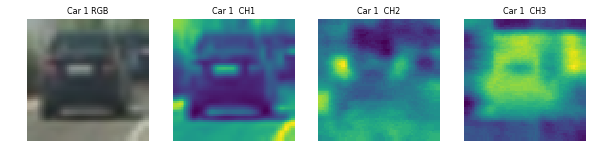

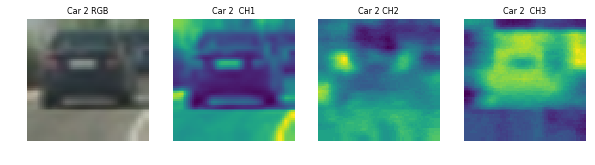

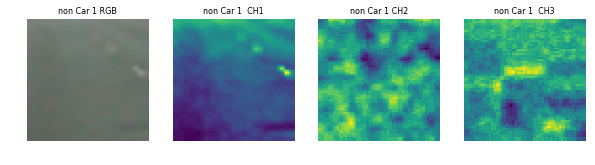

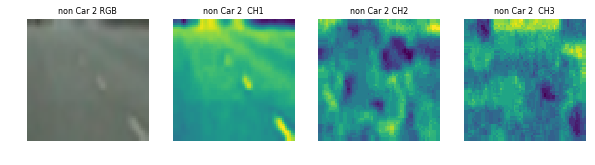

In [69]:
car1_rgb = mpimg.imread('C:\\Users\\Sally\\Anaconda3\\CarND-Vehicle-Detection\\test-vehicle\\image1.png')
car2_rgb = mpimg.imread('C:\\Users\\Sally\\Anaconda3\\CarND-Vehicle-Detection\\test-vehicle\\image2.png')
non1_rgb = mpimg.imread('C:\\Users\\Sally\\Anaconda3\\CarND-Vehicle-Detection\\test-non-vehicle\\image1.png')
non2_rgb = mpimg.imread('C:\\Users\\Sally\\Anaconda3\\CarND-Vehicle-Detection\\test-non-vehicle\\image2.png')


# experiment with RGB, HSV(no), LUV(Yes), HLS(no), YUV(Yes), YCrCb(Yes)

car1 = cv2.cvtColor(car1_rgb, cv2.COLOR_RGB2YCrCb)
car2 = cv2.cvtColor(car2_rgb, cv2.COLOR_RGB2YCrCb)
non1 = cv2.cvtColor(non1_rgb, cv2.COLOR_RGB2YCrCb)
non2 = cv2.cvtColor(non2_rgb, cv2.COLOR_RGB2YCrCb)

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4,figsize=(10,10))
ch1 = car1[:,:,0]
ch2 = car1[:,:,1]
ch3 = car1[:,:,2]
ax1.imshow(car1_rgb)
ax1.set_title('Car 1 RGB', fontsize=8)
ax1.set_axis_off()
ax2.imshow(ch1)
ax2.set_title('Car 1  CH1', fontsize=8)
ax2.set_axis_off()
ax3.imshow(ch2)
ax3.set_title('Car 1  CH2', fontsize=8)
ax3.set_axis_off()
ax4.imshow(ch3)
ax4.set_title('Car 1  CH3', fontsize=8)
ax4.set_axis_off()


f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(10,10))
ch1 = car2[:,:,0]
ch2 = car2[:,:,1]
ch3 = car2[:,:,2]
ax1.imshow(car2_rgb)
ax1.set_title('Car 2 RGB', fontsize=8)
ax1.set_axis_off()
ax2.imshow(ch1)
ax2.set_title('Car 2  CH1', fontsize=8)
ax2.set_axis_off()
ax3.imshow(ch2)
ax3.set_title('Car 2 CH2', fontsize=8)
ax3.set_axis_off()
ax4.imshow(ch3)
ax4.set_title('Car 2  CH3', fontsize=8)
ax4.set_axis_off()



f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(10,10))
ch1 = non1[:,:,0]
ch2 = non1[:,:,1]
ch3 = non1[:,:,2]
ax1.imshow(non1_rgb)
ax1.set_title('non Car 1 RGB', fontsize=8)
ax1.set_axis_off()
ax2.imshow(ch1)
ax2.set_title('non Car 1  CH1', fontsize=8)
ax2.set_axis_off()
ax3.imshow(ch2)
ax3.set_title('non Car 1 CH2', fontsize=8)
ax3.set_axis_off()
ax4.imshow(ch3)
ax4.set_title('non Car 1  CH3', fontsize=8)
ax4.set_axis_off()

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(10,10))
ch1 = non2[:,:,0]
ch2 = non2[:,:,1]
ch3 = non2[:,:,2]
ax1.imshow(non2_rgb)
ax1.set_title('non Car 2 RGB', fontsize=8)
ax1.set_axis_off()
ax2.imshow(ch1)
ax2.set_title('non Car 2  CH1', fontsize=8)
ax2.set_axis_off()
ax3.imshow(ch2)
ax3.set_title('non Car 2 CH2', fontsize=8)
ax3.set_axis_off()
ax4.imshow(ch3)
ax4.set_title('non Car 2  CH3', fontsize=8)
ax4.set_axis_off()


In [8]:
def extract_features(imgs, cspace='RGB', spatial_size=(32, 32),
                     hist_bins=32, orient=9, hist_range = (0,256),
                     pix_per_cell=8, cell_per_block=2, hog_channel= 0,
                     spatial_flag =True, hist_flag=True, hog_flag=True):

    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        # create feature
        tmp = []
        # Read in each one by one
        image = mpimg.imread(file)
        # apply color conversion if other than 'RGB'
        if cspace != 'RGB':
            if cspace == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif cspace == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif cspace == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif cspace == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif cspace == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)   
        else: 
            feature_image = np.copy(image)      
        # Apply bin_spatial() to get spatial color features
        if spatial_flag:
            spatial_features = bin_spatial(feature_image, size=spatial_size)
            tmp.append(spatial_features)
        if hist_flag:
        # Apply color_hist() also with a color space option 
            hist_features = color_hist(feature_image, nbins=hist_bins, bins_range=hist_range)
            tmp.append(hist_features)
        if hog_flag:
            if hog_channel == 'ALL':
                hog_features = []
                for channel in range(feature_image.shape[2]):
                    hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))
                hog_features = np.ravel(hog_features)        
            else:
                hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
        # Append the new feature vector to the features list
            tmp.append(hog_features)
        features.append(np.concatenate((tmp)))
    # Return list of feature vectors
    return features




In [9]:
# separate the car and non-car images

car_images = glob.glob('C:\\Users\\Sally\\Anaconda3\\CarND-Vehicle-Detection\\vehicles\\*\\*\\*.png')
noncar_images = glob.glob('C:\\Users\\Sally\\Anaconda3\\CarND-Vehicle-Detection\\non-vehicles\\*\\*\\*.png')

car = []
noncar = []

for img in car_images:
    car.append(img)
for img in noncar_images:
    noncar.append(img)




In [10]:

# Can be RGB, HSV, LUV, HLS, YUV, YCrCb
colorspace = 'YCrCb'
orient = 9
pix_per_cell = 8
cell_per_block = 2
hog_channel = 'ALL'
hist_range = (0,256)
spatial_size = (32,32)
hist_bins = 32
spatial_flag = True
hist_flag = True
hog_flag = True








In [11]:
t=time.time()

car_features = extract_features(car, cspace = colorspace,spatial_size=spatial_size,
                        hist_bins=hist_bins,orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                     hog_channel = hog_channel,  spatial_flag = spatial_flag, hist_flag = hist_flag, hog_flag = hog_flag)
notcar_features = extract_features(noncar, cspace = colorspace, spatial_size=spatial_size,
                        hist_bins=hist_bins, hist_range=hist_range,orient=orient, 
                        pix_per_cell = pix_per_cell, cell_per_block=cell_per_block, 
                     hog_channel = hog_channel,  spatial_flag = spatial_flag, hist_flag = hist_flag, hog_flag = hog_flag)


t2 = time.time()


print(round(t2-t, 2), 'Seconds to extract HOG features...')


C:\Users\Sally\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


173.3 Seconds to extract HOG features...


In [12]:
# Create an array stack of feature vectors
X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))


In [13]:
# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)

print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))
print (X_train.shape)
print (y_train.shape)

Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 8460
(14208, 8460)
(14208,)


In [15]:
# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t = time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))

37.0 Seconds to train SVC...
Test Accuracy of SVC =  0.9904


In [16]:
# Check the prediction time for a single sample
t=time.time()
n_predict = 10
print('My SVC predicts: ', svc.predict(X_test[0:n_predict]))
print('For these',n_predict, 'labels: ', y_test[0:n_predict])
t2 = time.time()
print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')

My SVC predicts:  [ 0.  1.  1.  1.  0.  1.  0.  0.  0.  1.]
For these 10 labels:  [ 0.  1.  1.  1.  0.  1.  0.  0.  0.  1.]
0.61459 Seconds to predict 10 labels with SVC


In [21]:
# save the model

joblib.dump(svc, 'C:\\Users\\Sally\\Anaconda3\\CarND-Vehicle-Detection\\saved_model\\model.pkl')

joblib.dump(X_scaler, 'C:\\Users\\Sally\\Anaconda3\\CarND-Vehicle-Detection\\saved_model\\x_scaler.pkl')

['C:\\Users\\Sally\\Anaconda3\\CarND-Vehicle-Detection\\saved_model\\x_scaler.pkl']

In [131]:
# save training data
training_data = {
                     'colorspace' : colorspace, 
                      'orient': orient,
                     'pix_per_cell' : pix_per_cell,
                     'cell_per block': cell_per_block,
                     'hog_channel' : hog_channel,
                     'hist_range' : hist_range,
                     'spatial_size' : spatial_size,
                     'hist_bins' : hist_bins,
                     'model' : svc,
                     'X_scaler' : scaled_X,
                     'spatial_flag' : True,
                     'hist_flag' : True,
                     'hog_flag' : True}

joblib.dump(training_data, 'C:\\Users\\Sally\\Anaconda3\\CarND-Vehicle-Detection\\saved_model\\training data.pkl')

['C:\\Users\\Sally\\Anaconda3\\CarND-Vehicle-Detection\\saved_model\\training data.pkl']

In [70]:
svc = joblib.load('C:\\Users\\Sally\\Anaconda3\\CarND-Vehicle-Detection\\saved_model\\model.pkl')


In [71]:
X_scaler = joblib.load('C:\\Users\\Sally\\Anaconda3\\CarND-Vehicle-Detection\\saved_model\\x_scaler.pkl')

In [72]:
print (type(X_scaler))
print (type(svc))


<class 'sklearn.preprocessing.data.StandardScaler'>
<class 'sklearn.svm.classes.LinearSVC'>


## sliding window search

In [73]:
## Define a function that returns a list of bounding boxes for the search windows
def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5)):
    # If x and/or y start/stop positions not defined, set to image size
    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[1]
    if y_start_stop[0] == None:
        y_start_stop[0] = 0
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]
    # Compute the span of the region to be searched    
    xspan = x_start_stop[1] - x_start_stop[0]
    yspan = y_start_stop[1] - y_start_stop[0]
    # Compute the number of pixels per step in x/y
    nx_pix_per_step = np.int(xy_window[0]*(1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1]*(1 - xy_overlap[1]))
    # Compute the number of windows in x/y
    nx_buffer = np.int(xy_window[0]*(xy_overlap[0]))
    ny_buffer = np.int(xy_window[1]*(xy_overlap[1]))
    nx_windows = np.int((xspan-nx_buffer)/nx_pix_per_step) 
    ny_windows = np.int((yspan-ny_buffer)/ny_pix_per_step) 
    # Initialize a list to append window positions to
    window_list = []
    # Loop through finding x and y window positions
    
    for ys in range(ny_windows):
        for xs in range(nx_windows):
            # Calculate window position
            startx = xs*nx_pix_per_step + x_start_stop[0]
            endx = startx + xy_window[0]
            starty = ys*ny_pix_per_step + y_start_stop[0]
            endy = starty + xy_window[1]
            # Append window position to list
            window_list.append(((startx, starty), (endx, endy)))
    # Return the list of windows
    return window_list

# define a function to draw bounding boxes
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy



In [74]:
# Define a function to extract features from a single image window
# This function is very similar to extract_features()
# just for a single image rather than list of images
def single_img_features(img, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):    
    #1) Define an empty list to receive features
    img_features = []
    #2) Apply color conversion if other than 'RGB'
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(img)      
    #3) Compute spatial features if flag is set
    if spatial_feat == True:
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        #4) Append features to list
        img_features.append(spatial_features)
    #5) Compute histogram features if flag is set
    if hist_feat == True:
        hist_features = color_hist(feature_image, nbins=hist_bins)
        #6) Append features to list
        img_features.append(hist_features)
    #7) Compute HOG features if flag is set
    if hog_feat == True:
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.extend(get_hog_features(feature_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))      
        else:
            hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
        #8) Append features to list
        img_features.append(hog_features)

    #9) Return concatenated array of features
    return np.concatenate(img_features)

# Define a function you will pass an image 
# and the list of windows to be searched (output of slide_windows())
def search_windows(img, windows, clf, scaler, color_space='RGB', 
                    spatial_size=(32, 32), hist_bins=32, 
                    hist_range=(0, 256), orient=9, 
                    pix_per_cell=8, cell_per_block=2, 
                    hog_channel=0, spatial_feat=True, 
                    hist_feat=True, hog_feat=True):

    #1) Create an empty list to receive positive detection windows
    on_windows = []
    #2) Iterate over all windows in the list
    for window in windows:
        #3) Extract the test window from original image
        test_img = cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], (64, 64))      
        #4) Extract features for that window using single_img_features()
        features = single_img_features(test_img, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)
        #5) Scale extracted features to be fed to classifier
        test_features = scaler.transform(np.array(features).reshape(1, -1))
        #6) Predict using your classifier
        prediction = clf.predict(test_features)
        #7) If positive (prediction == 1) then save the window
        if prediction == 1:
            on_windows.append(window)
    #8) Return windows for positive detections
    return on_windows
    

In [75]:
colorspace = 'YCrCb'
orient = 9
pix_per_cell = 8
cell_per_block = 2
hog_channel = 'ALL'
spatial_size = (32,32)
hist_bins = 32
spatial_feat = True
hist_feat = True
hog_feat = True
y_start_stop = [370, None]



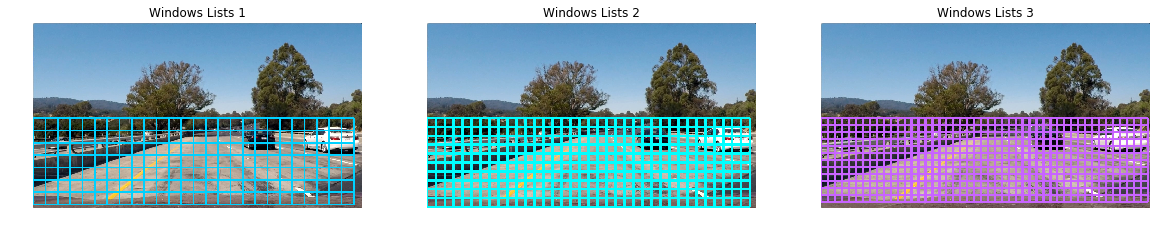

In [76]:
image = mpimg.imread('C:\\Users\\Sally\\Anaconda3\\CarND-Vehicle-Detection\\test_images\\test1.jpg')
draw_image = np.copy(image)


image = image.astype(np.float32)/255


window_1 = slide_window(image, x_start_stop=[None, None], y_start_stop= y_start_stop, 
                    xy_window=(96, 96), xy_overlap=(0.5, 0.5))
window_2 = slide_window(image, x_start_stop=[None, None], y_start_stop= y_start_stop, 
                    xy_window=(100, 100), xy_overlap=(0.65, 0.65))
window_3 = slide_window(image, x_start_stop=[None, None], y_start_stop= y_start_stop, 
                    xy_window=(110, 110), xy_overlap=(0.75, 0.75))

windows_1 = draw_boxes(draw_image, window_1, color=(0, 209, 255), thick=6)
windows_2 = draw_boxes(draw_image, window_2, color=(0, 255, 255), thick=6)
windows_3 = draw_boxes(draw_image, window_3, color=(200, 100, 255), thick=6)
                        
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))


ax1.imshow(windows_1)
ax1.axis('off')
ax1.set_title('Windows Lists 1', fontsize=12)

ax2.imshow(windows_2)
ax2.axis('off')
ax2.set_title('Windows Lists 2', fontsize=12)

ax3.imshow(windows_3)
ax3.axis('off')
ax3.set_title('Windows Lists 3', fontsize=12)


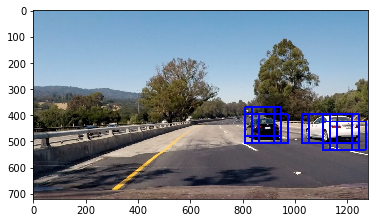

In [77]:
#test_images = glob.glob('C:\\Users\\Sally\\Anaconda3\\CarND-Vehicle-Detection\\test_images\\test*.jpg')

image = mpimg.imread('C:\\Users\\Sally\\Anaconda3\\CarND-Vehicle-Detection\\test_images\\test4.jpg')

draw_image = np.copy(image)

# Uncomment the following line if you extracted training
# data from .png images (scaled 0 to 1 by mpimg) and the
# image you are searching is a .jpg (scaled 0 to 255)

image = image.astype(np.float32)/255

windows = slide_window(image, x_start_stop=[None, None], y_start_stop=y_start_stop, 
                    xy_window=(110, 110), xy_overlap=(0.75, 0.75))

hot_windows = search_windows(image, windows, svc, X_scaler, color_space=colorspace, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)                       

window_img = draw_boxes(draw_image, hot_windows, color=(0, 0, 255), thick=6)                    

plt.imshow(window_img)


In [83]:
def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap# Iterate through list of bboxes
    
def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap

def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return img





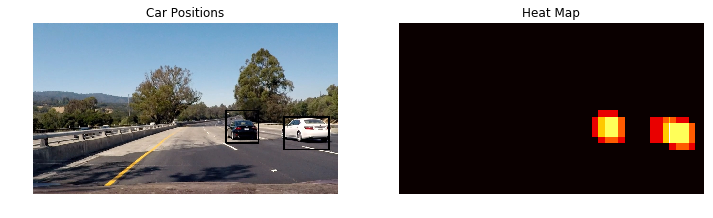

In [84]:

heat = np.zeros_like(image[:,:,0]).astype(np.float)


# Add heat to each box in box list
heat = add_heat(heat,hot_windows)
    
# Apply threshold to help remove false positives
heat = apply_threshold(heat,1)

# Visualize the heatmap when displaying    
heatmap = np.clip(heat, 0, 255)

# Find final boxes from heatmap using label function
labels = label(heatmap)
draw_img = draw_labeled_bboxes(np.copy(image), labels)



f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 12))
ax1.imshow(draw_img)
ax1.axis('off')
ax1.set_title('Car Positions', fontsize=12)

ax2.imshow(heatmap, cmap = 'hot')
ax2.axis('off')
ax2.set_title('Heat Map', fontsize=12)


## Hog Sub-sampling Window Search

In [85]:
def convert_color(img, conv='RGB2YCrCb'):
    if conv == 'RGB2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    if conv == 'BGR2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    if conv == 'RGB2LUV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2LUV)

In [86]:
def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap# Iterate through list of bboxes
    
def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap

def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    rects = []
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        
        #rects.append(bbox)
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return img

In [87]:
# Define a single function that can extract features using hog sub-sampling and make predictions
def find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins):
  
    draw_img = np.copy(img)
    
    img = img.astype(np.float32)/255
    
    img_tosearch = img[ystart:ystop,:,:]
    ctrans_tosearch = convert_color(img_tosearch, conv='RGB2YCrCb')
    if scale != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
        
    ch1 = ctrans_tosearch[:,:,0]
    ch2 = ctrans_tosearch[:,:,1]
    ch3 = ctrans_tosearch[:,:,2]

    # Define blocks and steps as above
    nxblocks = (ch1.shape[1] // pix_per_cell) - cell_per_block + 1
    nyblocks = (ch1.shape[0] // pix_per_cell) - cell_per_block + 1 
    nfeat_per_block = orient*cell_per_block**2
    
    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // pix_per_cell) - cell_per_block + 1
    cells_per_step = 2  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step + 1
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step + 1
    
    # Compute individual channel HOG features for the entire image
    hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)
    windows = []
    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step
            # Extract HOG for this patch
            hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))

            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell

            # Extract the image patch
            subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (64,64))
          
            # Get color features
            spatial_features = bin_spatial(subimg, size=spatial_size)
            hist_features = color_hist(subimg, nbins=hist_bins)

            # Scale features and make a prediction
            test_features = X_scaler.transform(np.hstack((spatial_features, hist_features, hog_features)).reshape(1, -1))    
            #test_features = X_scaler.transform(np.hstack((shape_feat, hist_feat)).reshape(1, -1))    
            test_prediction = svc.predict(test_features)
            
            if test_prediction == 1:
                xbox_left = np.int(xleft*scale)
                ytop_draw = np.int(ytop*scale)
                win_draw = np.int(window*scale)
                windows.append(((xbox_left,ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart)))
                cv2.rectangle(draw_img,(xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart),(0,0,255),6) 
    
    #heat = np.zeros_like(draw_img[:,:,0]).astype(np.float)
    
    #heat = add_heat(heat,windows)
    
    #heat = apply_threshold(heat,1)
    
    #heatmap = np.clip(heat, 0, 255)
    #labels = label(heatmap)
    #final_img = draw_labeled_bboxes(np.copy(img), labels)

    
 
    return draw_img, windows
 


In [88]:
colorspace = 'YCrCb'
orient = 9
pix_per_cell = 8
cell_per_block = 2
hog_channel = 'ALL'
spatial_size = (32,32)
hist_bins = 32
spatial_feat = True
hist_feat = True
hog_feat = True
test_flag = True
ystart = 380
ystop = 600
scale = 2.0

(720, 1280, 3)
[((800, 380), (928, 508)), ((832, 380), (960, 508)), ((832, 412), (960, 540)), ((864, 380), (992, 508)), ((896, 380), (1024, 508)), ((1024, 380), (1152, 508)), ((1056, 380), (1184, 508)), ((1056, 412), (1184, 540)), ((1088, 380), (1216, 508)), ((1088, 412), (1216, 540))]


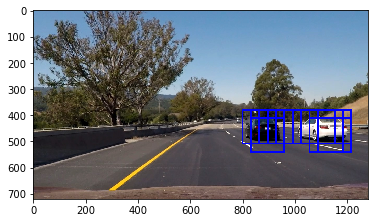

In [117]:
image = mpimg.imread('C:\\Users\\Sally\\Anaconda3\\CarND-Vehicle-Detection\\test_images\\test6.jpg') 
print (image.shape)
ystart = 380
ystop = 600
scale = 2.0

out_img, windows_list = find_cars(image, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)

print (windows_list)
plt.imshow(out_img)

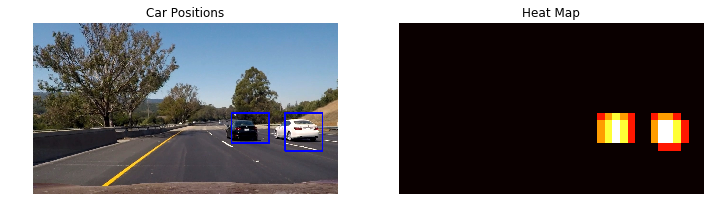

In [118]:

heat = np.zeros_like(image[:,:,0]).astype(np.float)


# Add heat to each box in box list
heat = add_heat(heat,windows_list)
    
# Apply threshold to help remove false positives
heat = apply_threshold(heat,1)

# Visualize the heatmap when displaying    
heatmap = np.clip(heat, 0, 255)

# Find final boxes from heatmap using label function
labels = label(heatmap)
draw_img = draw_labeled_bboxes(np.copy(image), labels)



f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 12))
ax1.imshow(draw_img)
ax1.axis('off')
ax1.set_title('Car Positions', fontsize=12)

ax2.imshow(heatmap, cmap = 'hot')
ax2.axis('off')
ax2.set_title('Heat Map', fontsize=12)


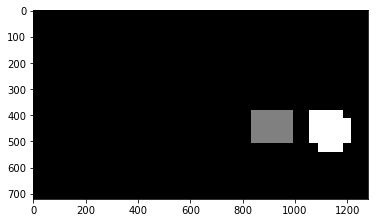

In [116]:
from scipy.ndimage.measurements import label
labels = label(heatmap)
plt.imshow(labels[0], cmap='gray')


## multi-scale method

In [91]:
image = mpimg.imread('C:\\Users\\Sally\\Anaconda3\\CarND-Vehicle-Detection\\test_images\\test3.jpg')  
windows_total = []

ystart = 380
ystop = 600
scale = 1.2
__, out_1 = find_cars(image, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
windows_total.append(out_1)


ystart = 400
ystop = 656
scale = 1.5
__, out_2 = find_cars(image, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
windows_total.append(out_2)

ystart = 400
ystop = 700
scale = 1.8
__, out_3 = find_cars(image, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
windows_total.append(out_3)


windows_final = []
for group in windows_total:
    for item in group:
        windows_final.append(item)


print (windows_final)
#windows_list = find_cars(image, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
#plt.imshow(out_img)

[((883, 399), (959, 475)), ((883, 418), (959, 494)), ((864, 400), (960, 496)), ((888, 400), (984, 496))]


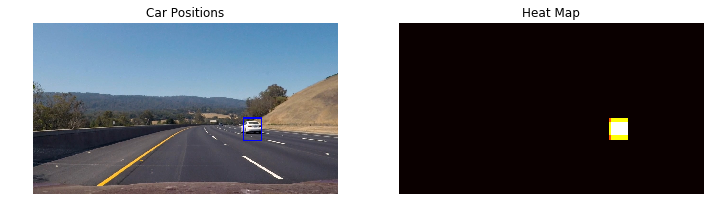

In [92]:
#image = mpimg.imread('C:\\Users\\Sally\\Anaconda3\\CarND-Vehicle-Detection\\test_images\\test5.jpg')
heat = np.zeros_like(image[:,:,0]).astype(np.float)


# Add heat to each box in box list
heat = add_heat(heat,windows_final)
    
# Apply threshold to help remove false positives
heat = apply_threshold(heat,1)

# Visualize the heatmap when displaying    
heatmap = np.clip(heat, 0, 255)

# Find final boxes from heatmap using label function
labels = label(heatmap)
draw_img = draw_labeled_bboxes(np.copy(image), labels)



f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 12))
ax1.imshow(draw_img)
ax1.axis('off')
ax1.set_title('Car Positions', fontsize=12)

ax2.imshow(heatmap, cmap = 'hot')
ax2.axis('off')
ax2.set_title('Heat Map', fontsize=12)



## final pipeline

In [93]:
colorspace = 'YCrCb'
orient = 9
pix_per_cell = 8
cell_per_block = 2
hog_channel = 'ALL'
spatial_size = (32,32)
hist_bins = 32
spatial_feat = True
hist_feat = True
hog_feat = True


In [94]:
from collections import deque

class detect_vehicle:
    def __init__(self):
    
        self.ystart = 380
        self.ystop = 600

        self.scale = [1.2, 1.5, 1.8, 2.5]
    
        self.heatmap = None
        self.heat_images = deque(maxlen=5)
       
       

        


In [110]:
def pipeline_find_car(img):
    
    draw_img = np.copy(img)
    img = img.astype(np.float32)/255

    # create lists to store all the bounding boxes
    windows = []

    # Iterate through for each scale from the list above
    for sc in detect.scale:
        img_tosearch = img[detect.ystart:detect.ystop,:,:]
        ctrans_tosearch = convert_color(img_tosearch, conv='RGB2YCrCb')
        
        if sc!= 1:
            imshape = ctrans_tosearch.shape
            ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/sc), np.int(imshape[0]/sc)))

        ch1 = ctrans_tosearch[:,:,0]
        ch2 = ctrans_tosearch[:,:,1]
        ch3 = ctrans_tosearch[:,:,2]

        # Define blocks and steps as above
        nxblocks = (ch1.shape[1] // pix_per_cell)-1
        nyblocks = (ch1.shape[0] // pix_per_cell)-1 
        nfeat_per_block = orient*cell_per_block**2
        
        # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
        window = 64
        nblocks_per_window = (window // pix_per_cell)-1 
        cells_per_step = 2  # How many cells to step
        nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
        nysteps = (nyblocks - nblocks_per_window) // cells_per_step

        # Compute individual channel HOG features for the entire image
        hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
        hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
        hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)

        for xb in range(nxsteps):
            for yb in range(nysteps):
                ypos = yb*cells_per_step
                xpos = xb*cells_per_step
                # Extract HOG for this patch
                hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
                hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
                hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
                hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))

                xleft = xpos*pix_per_cell
                ytop = ypos*pix_per_cell

                # Extract the image patch
                subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (64,64))

                # Get color features
                spatial_features = bin_spatial(subimg, size=spatial_size)
                hist_features = color_hist(subimg, nbins=hist_bins)

                # Scale features and make a prediction
                test_features = X_scaler.transform(np.hstack((spatial_features, hist_features, hog_features)).reshape(1, -1))       
                decision_values = svc.decision_function(test_features)
                test_prediction = svc.predict(test_features)
                
                if test_prediction == 1 and abs(decision_values) > 0.3: 
                    xbox_left = np.int(xleft*sc)
                    ytop_draw = np.int(ytop*sc)
                    win_draw = np.int(window*sc)
                    windows.append(((xbox_left, ytop_draw+detect.ystart),(xbox_left+win_draw,ytop_draw+win_draw+detect.ystart)))
    
    detect.heat = np.zeros_like(img[:,:,0]).astype(np.float)

    # Add heat to each box in box list
    detect.heat = add_heat(detect.heat,windows)

    # Append the heatmap to the heat_images list
    detect.heat_images.append(detect.heat)

    # average the heat_images lists over the last n frames
    avg_heat = np.average(np.array(detect.heat_images), axis=0)
    
    # Apply threshold to help remove false positives
    avg_heat = apply_threshold(avg_heat,2)

    # Visualize the heatmap when displaying    
    heatmap = np.clip(avg_heat, 0, 255)

    # Find final boxes from heatmap using label function
    labels = label(heatmap)
    final_img = draw_labeled_bboxes(draw_img, labels)
    
        
    
    return final_img
        


In [111]:
detect = detect_vehicle()

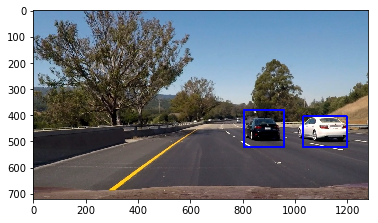

In [112]:
image = mpimg.imread('C:\\Users\\Sally\\Anaconda3\\CarND-Vehicle-Detection\\test_images\\test6.jpg')
result = pipeline_find_car(image)

plt.imshow(result)

In [24]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

video_output = "output_videos/project_final_video_new.mp4"
clip1 = VideoFileClip("project_video.mp4")
white_clip = clip1.fl_image(pipeline_find_car)
%time white_clip.write_videofile(video_output, audio=False)

[MoviePy] >>>> Building video output_videos/project_final_video_new.mp4
[MoviePy] Writing video output_videos/project_final_video_new.mp4


100%|█████████████████████████████████████████████████████████████████████████████▉| 1260/1261 [33:07<00:01,  1.35s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output_videos/project_final_video_new.mp4 

Wall time: 33min 8s
